In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pkl_file = open("enwiki-redirects-minus-processed.pickle", 'rb')
df = pickle.load(pkl_file)
len(df)


217066

In [3]:
for x in df[0:5].iterrows():
    print(x[1].page_text, x[1].page_text.find("–"))

#redirect[[9–9–9_Plan]] 12
#REDIRECT [['A' You're Adorable]] -1
#REDIRECT [[A, My Name is Alex – Parts I & II]] {{R from modification}} 31
#REDIRECT [[Abd El Gilil]]
{{R from title without diacritics}} -1
#REDIRECT [[Abd El Gilil]] {{R from modification}} -1


In [4]:
def is_endash_redirect(row):
    page_text = row.page_text
    page_title = row.page_title
    
    title_dash_loc = page_title.find("-")
    text_dash_loc = page_text.find("–")
        
    if text_dash_loc == -1 or title_dash_loc == -1:
        return False
    
    sep = text_dash_loc - title_dash_loc
    
    if sep > 10 or sep < 14:
        return True
    else:
        return False

In [5]:
df['is_endash_redirect'] = df.apply(is_endash_redirect, axis=1)

df['is_endash_redirect'].value_counts()

False    114314
True     102752
Name: is_endash_redirect, dtype: int64

In [6]:
df[0:5]

,revid,timestamp,user,comment,is_redirect,page_title,page_namespace,page_text,is_endash_redirect
0,458759075.0,2011-11-03T04:42:22Z,Hodgdon's secret garden,9–9–9 plan,True,"""9-9-9"" plan",0.0,#redirect[[9–9–9_Plan]],True
0,458759075.0,2011-11-03T04:42:22Z,Hodgdon's secret garden,9–9–9 plan,True,"""A"" - You're Adorable",0.0,#REDIRECT [['A' You're Adorable]],False
0,490413426.0,2012-05-03T04:28:55Z,DASHBot,"DASHBot moved page [[""A,"" My Name is Alex - Pa...",True,"""A,"" My Name is Alex - Parts I & II",0.0,"#REDIRECT [[A, My Name is Alex – Parts I & II]...",True
0,490413426.0,2012-05-03T04:28:55Z,DASHBot,"DASHBot moved page [[""A,"" My Name is Alex - Pa...",True,"""Abd el-Gilil",0.0,#REDIRECT [[Abd El Gilil]]\n{{R from title wit...,False
0,490413426.0,2012-05-03T04:28:55Z,DASHBot,"DASHBot moved page [[""A,"" My Name is Alex - Pa...",True,"""Abd el-Gilîl",0.0,#REDIRECT [[Abd El Gilil]] {{R from modificati...,False


In [7]:
total_df = df[df.is_endash_redirect == True].copy()

In [8]:
total_df['datetime'] = pd.to_datetime(total_df['timestamp'])


In [9]:
total_df = total_df.set_index('datetime')

In [20]:
gp = total_df.groupby([pd.TimeGrouper('3D', closed='left')])

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


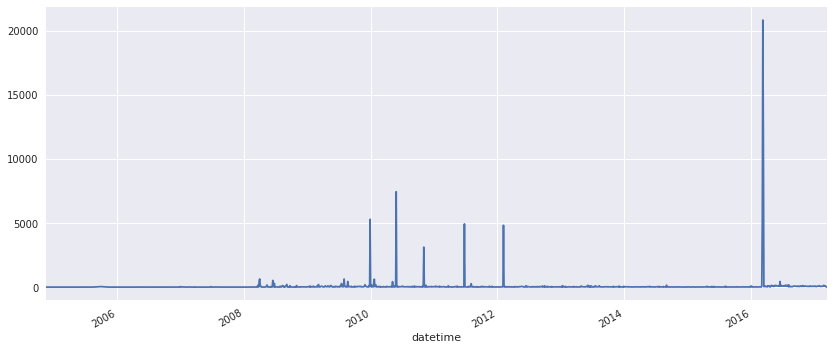

In [21]:
ax = gp.revid.count().plot(kind='line', figsize=[14,6], logy=False)
